<a href="https://colab.research.google.com/github/CharlotteY2003/MIT-Futuremakers/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras import regularizers
from keras import backend as K

In [2]:
encoding_dim = 32

In [3]:
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784,activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img,decoded)


In [4]:
encoder = keras.Model(input_img, encoded)

In [5]:
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input,decoder_layer(encoded_input))

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
(X_train, _), (X_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [8]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test),np.prod(X_test.shape[1:]))
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
autoencoder.fit(X_train,X_train,epochs=100,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/100
235/235 [==============================] - 17s 13ms/step - loss: 0.3874 - val_loss: 0.1976
Epoch 2/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1878 - val_loss: 0.1621
Epoch 3/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1582 - val_loss: 0.1436
Epoch 4/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1415 - val_loss: 0.1318
Epoch 5/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1306 - val_loss: 0.1239
Epoch 6/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1237 - val_loss: 0.1184
Epoch 7/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1183 - val_loss: 0.1143
Epoch 8/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1147 - val_loss: 0.1111
Epoch 9/100
235/235 [==============================] - 3s 12ms/step - loss: 0.1117 - val_loss: 0.1088
Epoch 10/100
235/235 [==============================] - 3s 12ms/step - loss: 0.10

In [10]:
encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

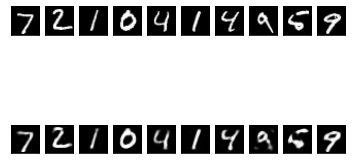

In [11]:
n=10
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, 1+i+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Deep Autoencoder

In [12]:
input_img = Input(shape=(784,))
encoded = Dense(128,activation='relu')(input_img)
encoded = Dense(64,activation='relu')(encoded)
encoded = Dense(32,activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

deep_autoencoder = keras.Model(input_img,decoded)
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [13]:
deep_autoencoder.fit(X_train,X_train,epochs=100,batch_size=256,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/100
235/235 [==============================] - 5s 19ms/step - loss: 0.3398 - val_loss: 0.1626
Epoch 2/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1545 - val_loss: 0.1363
Epoch 3/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1339 - val_loss: 0.1238
Epoch 4/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1233 - val_loss: 0.1177
Epoch 5/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1173 - val_loss: 0.1133
Epoch 6/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1134 - val_loss: 0.1093
Epoch 7/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1094 - val_loss: 0.1061
Epoch 8/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1068 - val_loss: 0.1044
Epoch 9/100
235/235 [==============================] - 4s 18ms/step - loss: 0.1046 - val_loss: 0.1022
Epoch 10/100
235/235 [==============================] - 4s 18ms/step - loss: 0.103

In [14]:
encoded_imgs = deep_autoencoder.predict(X_test)
decoded_imgs = deep_autoencoder.predict(encoded_imgs)

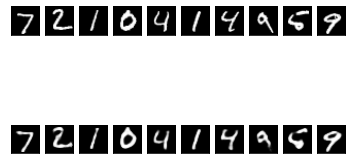

In [15]:
n=10
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, 1+i+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Convolutional Autoencoder

In [16]:
input_img = Input(shape=(28,28,1))
x = Conv2D(16,(3,3),activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(8, (3,3),activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)
#representation = (4,4,8) or 128 dimensional

x = Conv2D(8,(3,3),activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)
x = Conv2D(16, (3,3),activation='relu')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

conv_autoencoder = keras.Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [17]:
(X_train,_), (X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test), 28,28,1)

In [18]:
conv_autoencoder.fit(X_train,X_train,epochs=50,batch_size=128,shuffle=True,validation_data=(X_test,X_test))

Epoch 1/50
469/469 [==============================] - 81s 167ms/step - loss: 0.2842 - val_loss: 0.1439
Epoch 2/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1387 - val_loss: 0.1267
Epoch 3/50
469/469 [==============================] - 78s 165ms/step - loss: 0.1243 - val_loss: 0.1173
Epoch 4/50
469/469 [==============================] - 78s 165ms/step - loss: 0.1170 - val_loss: 0.1119
Epoch 5/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1124 - val_loss: 0.1085
Epoch 6/50
469/469 [==============================] - 78s 165ms/step - loss: 0.1090 - val_loss: 0.1060
Epoch 7/50
469/469 [==============================] - 78s 165ms/step - loss: 0.1066 - val_loss: 0.1042
Epoch 8/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1045 - val_loss: 0.1020
Epoch 9/50
469/469 [==============================] - 78s 166ms/step - loss: 0.1030 - val_loss: 0.1014
Epoch 10/50
469/469 [==============================] - 77s 165ms/step - l

In [19]:
decoded_imgs = conv_autoencoder.predict(X_test)

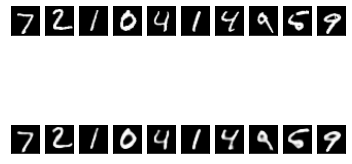

In [20]:
n=10
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, 1+i+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

ValueError: ignored

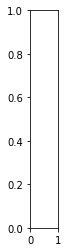

In [21]:
encoder = keras.Model(input_img,encoded)
encoder_imgs = encoder.predict(X_test)

n=10
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(encoded_imgs[i].reshape((4,4*8)).T) #what does .T do?
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

#Application to image denoising

In [22]:
(X_train,_), (X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape(len(X_train),28,28,1)
X_test = X_test.reshape(len(X_test),28,28,1)

noise_factor = .5
X_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=X_train.shape)
X_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=X_test.shape)

X_train_noisy = np.clip(X_train_noisy,0.,1.)
X_test_noisy = np.clip(X_test_noisy,0.,1.)

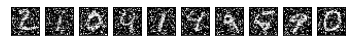

In [23]:
n=10
for i in range(1,n+1):
  ax = plt.subplot(1,n,i)
  plt.imshow(X_test_noisy[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()

In [24]:
input_img = Input(shape=(28,28,1))
x = Conv2D(32,(3,3),activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same')(x)
#representation = (4,4,8) or 128 dimensional

x = Conv2D(32,(3,3),activation='relu', padding='same')(encoded)
x = UpSampling2D((2,2))(x)
x = Conv2D(32,(3,3), activation='relu', padding='same')(x)
x = UpSampling2D((2,2))(x)

decoded = Conv2D(1,(3,3), activation='sigmoid', padding='same')(x)

noise_autoencoder = keras.Model(input_img, decoded)
noise_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
noise_autoencoder.fit(X_train_noisy,X_train,epochs=100,batch_size=128,shuffle=True,validation_data=(X_test_noisy,X_test))

Epoch 1/100
469/469 [==============================] - 149s 317ms/step - loss: 0.2569 - val_loss: 0.1188
Epoch 2/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1171 - val_loss: 0.1099
Epoch 3/100
469/469 [==============================] - 149s 318ms/step - loss: 0.1103 - val_loss: 0.1059
Epoch 4/100
469/469 [==============================] - 149s 317ms/step - loss: 0.1060 - val_loss: 0.1033
Epoch 5/100
469/469 [==============================] - 149s 318ms/step - loss: 0.1039 - val_loss: 0.1014
Epoch 6/100
469/469 [==============================] - 150s 320ms/step - loss: 0.1021 - val_loss: 0.1002
Epoch 7/100
469/469 [==============================] - 150s 319ms/step - loss: 0.1011 - val_loss: 0.1004
Epoch 8/100
469/469 [==============================] - 150s 320ms/step - loss: 0.1002 - val_loss: 0.0985
Epoch 9/100
469/469 [==============================] - 150s 320ms/step - loss: 0.0993 - val_loss: 0.0979
Epoch 10/100
469/469 [==============================] -

In [ ]:
decoded_imgs = autoencoder(X_test_noisy)

In [ ]:
n=10
for i in range(n):
  ax = plt.subplot(2,n,i+1)
  plt.imshow(X_test[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, 1+i+n)
  plt.imshow(decoded_imgs[i].reshape(28,28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

#Variational autoencoder

In [ ]:
oringal_dim = 28*28
intermediete_dim = 64
latent_dim=2

inputs = Input(shape=(original_dim,))
h = Dense(intermediete_dim,activation='relu')(inputs)
z_mean = Dense(latent_dim)(h)
z_log_sigma = Dense(latent_dim)(h)

In [ ]:
def sampling(args):
  z_mean,z_log_sigma = args
  epsilon = K.random_normal(shape=(K.shape(z_mean)[0],latent_dim,
                                   mean-0,stddev=.1))
  return z_mean + K.exp(z_log_sigma) * epsilon

z = Lambda(sampling)([z_mea,z_log_sigma])

In [ ]:
encoder = Model(inputs,[z_mean,z_log_sigma], name='encoder')

latent_inputs = Input(shape=(latent_dim),name='z_sampling')
x = Dense(intermediete_dim,activation='relu')(latent_inputs)
outputs = Dense(original_dim,activation='sigmoid')(x)
decoder = Model(latent_inputs,outputs, name='decoder')

#create VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs,outputs,name='val_mlp')

In [ ]:
reconstruction_loss = losses.binary_crossentropy(inputs,outputs)
reconstruction_loss *= orginal_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss = K.sum(kl_loss,axis=1)
kl_loss *= -.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

In [ ]:
(X_train,_), (X_test,_) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0
X_train = X_train.reshape(len(X_train),np.prod(X_train.shape[1:]))
X_test = X_test.reshape(len(X_test), np.prod(X_test.shape[1:]))

In [ ]:
vae.fit(X_train,X_train,epochs=100,batch_size=32,validation_data=(X_test,X_test))

In [ ]:
X_test_encoded = encoder.predict(X_test,batch_size=batch_size)
plt.figure(figsize=(6,6))
plt.scatter(X_test_encoded[:,0], x_test_encoded[:,1], c=y_test)
plt.colorbar()
plt.show()

In [ ]:
# Display a 2D manifold of the digits
n = 15  # figure with 15x15 digits
digit_size = 28
figure = np.zeros((digit_size * n, digit_size * n))
# sample n points within [-15, 15] standard deviations
grid_x = np.linspace(-15, 15, n)
grid_y = np.linspace(-15, 15, n)

for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[i * digit_size: (i + 1) * digit_size,
               j * digit_size: (j + 1) * digit_size] = digit

plt.figure(figsize=(10, 10))
plt.imshow(figure)
plt.show()